In [18]:
!pip install shap
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import shap
import transformers
import nlp
import torch
from pathlib import Path
import numpy as np
import scipy as sp

# project_dir = Path.cwd()
# print(project_dir)

from transformers import AutoModelForSequenceClassification
# load a BERT sentiment analysis model
tokenizer = transformers.AutoTokenizer.from_pretrained("ProsusAI/finbert")
# model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").cuda()
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L11/classifier_model/finbert-sentiment'
model = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

# build an explainer using a token masker


In [25]:
print(model.bert.encoder.layer[11].attention.self.query.weight)

Parameter containing:
tensor([[-0.0377, -0.0003, -0.0398,  ..., -0.0522,  0.0485, -0.0550],
        [-0.0633, -0.0392, -0.0100,  ...,  0.0319, -0.0774,  0.0111],
        [-0.0338,  0.0642, -0.0907,  ...,  0.0180, -0.0611, -0.0775],
        ...,
        [ 0.0417,  0.0109, -0.0371,  ..., -0.0540, -0.0541,  0.0083],
        [ 0.0706, -0.0197,  0.0436,  ..., -0.0025, -0.0765, -0.0080],
        [-0.0537,  0.0378,  0.0340,  ...,  0.0246,  0.0557, -0.0510]],
       device='cuda:0', requires_grad=True)


In [ ]:
pip install datasets

In [ ]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

df=pd.read_csv("dataforshap.csv", encoding="latin", header=[0])
df

In [ ]:
desc=df['ï»¿Description']
print(type(desc))

df2 = desc.to_frame(name="Desc")
print(type(df2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
dataset = ds.dataset(pa.Table.from_pandas(df2).to_batches())

### convert to Huggingface dataset
data = Dataset(pa.Table.from_pandas(df2))

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:20,  3.47s/it]


In [ ]:
print(data[3:4])

{'Desc': ['Finnish electronics contract manufacturer Scanfil reports net sales of EUR 58.9 mn in the second quarter of 2007 , down from EUR 62.4 mn a year earlier .']}


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


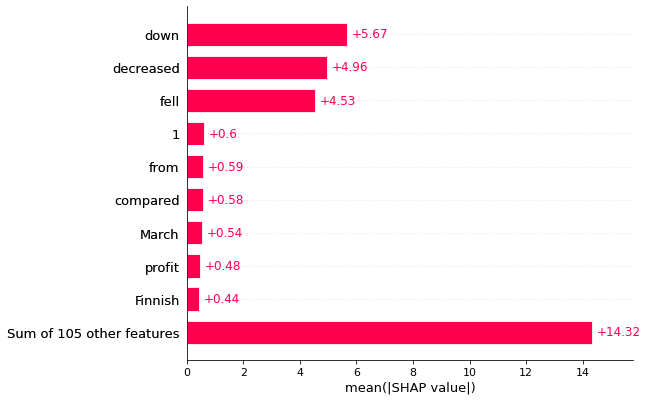

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L10/classifier_model/finbert-sentiment'
model2 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model2(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val


In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:16,  4.01s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


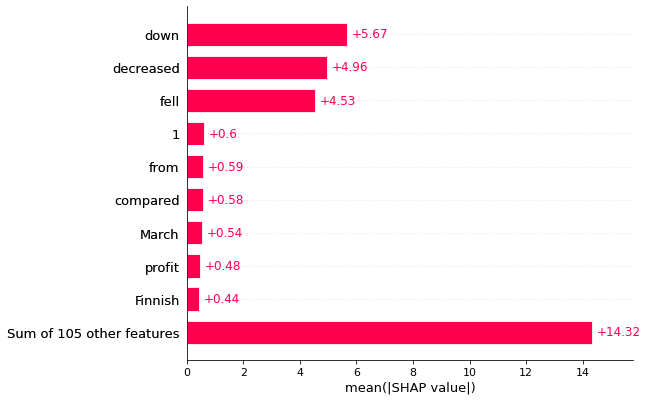

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L9/classifier_model/finbert-sentiment'
model3 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model3(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.97s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


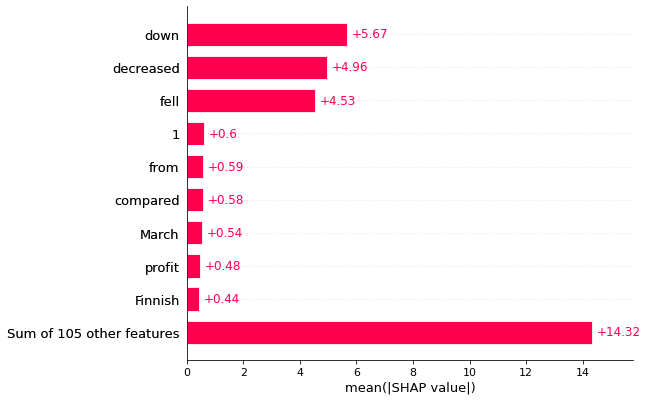

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L8/classifier_model/finbert-sentiment'
model4 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model4(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.96s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


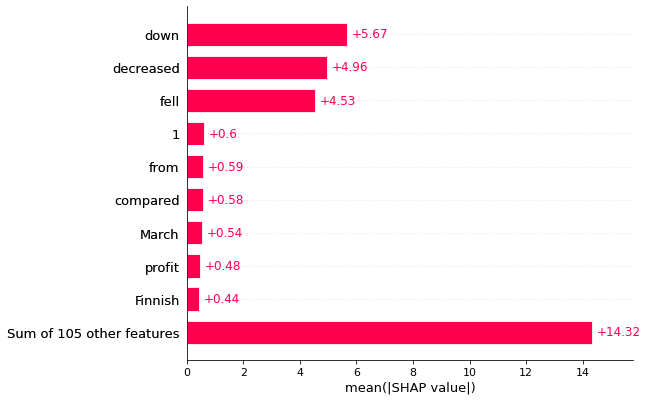

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L7/classifier_model/finbert-sentiment'
model5 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model5(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:16,  4.03s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


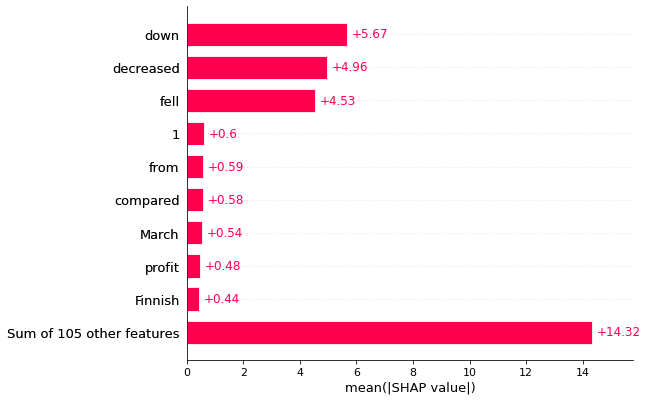

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L6/classifier_model/finbert-sentiment'
model6 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model6(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.95s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


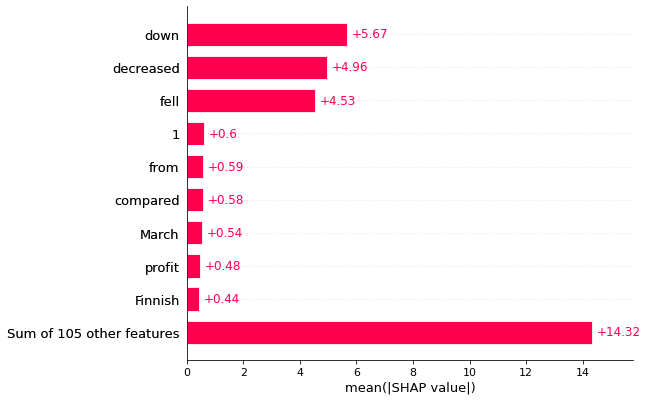

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L5/classifier_model/finbert-sentiment'
model7 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model7(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.92s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


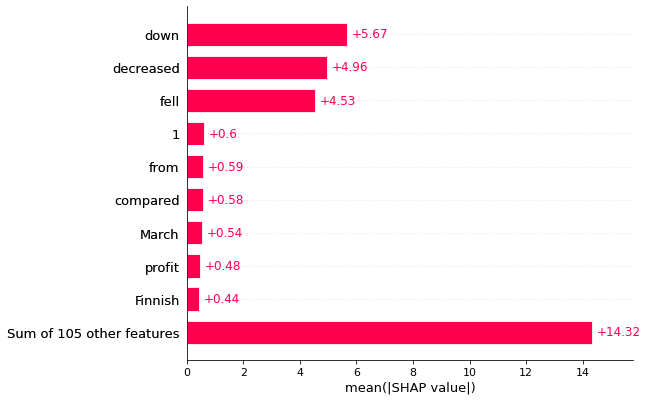

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L4/classifier_model/finbert-sentiment'
model8 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model8(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:16,  4.00s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


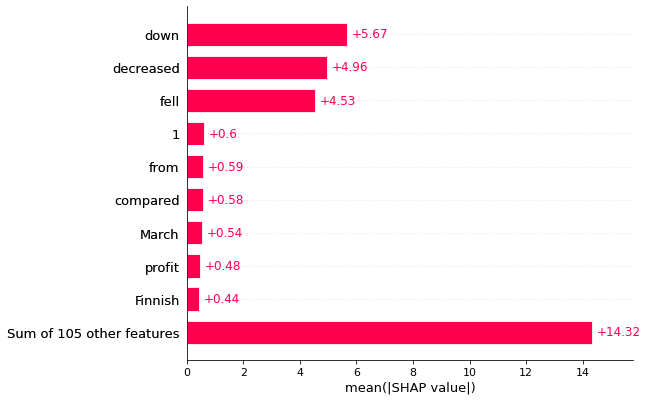

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L3/classifier_model/finbert-sentiment'
model9 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model9(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.93s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


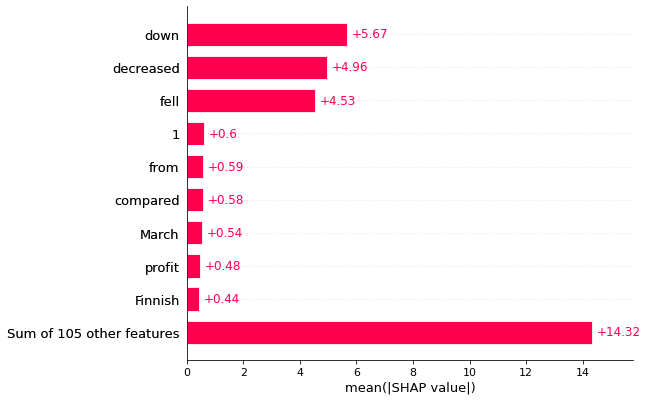

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L2/classifier_model/finbert-sentiment'
model10 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model10(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.93s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


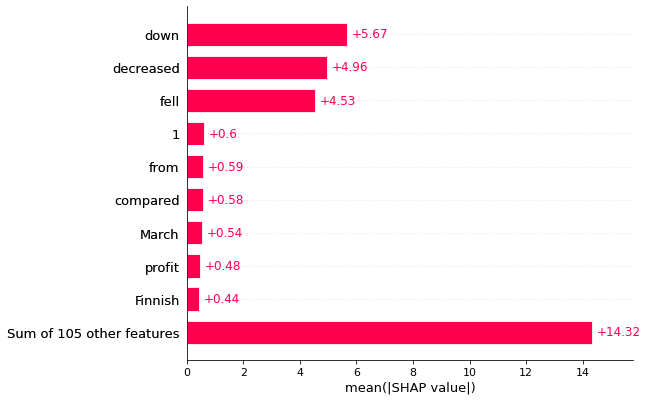

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L1/classifier_model/finbert-sentiment'
model11 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model11(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.92s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


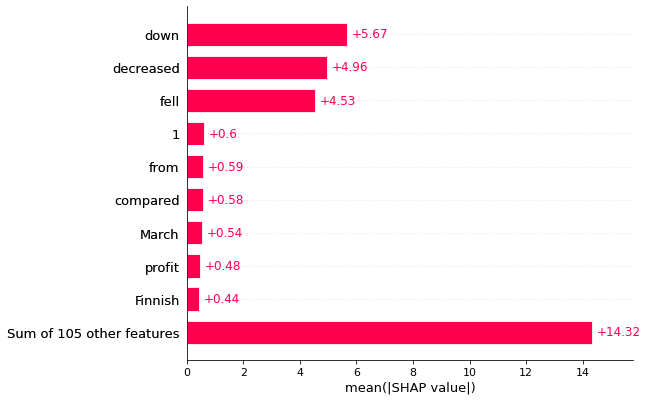

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
cl_path = '/content/drive/MyDrive/UNCHANGEDweights/L0/classifier_model/finbert-sentiment'
model12 = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model12(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:15,  3.92s/it]


In [ ]:
shap.plots.text(shap_values[3:4])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


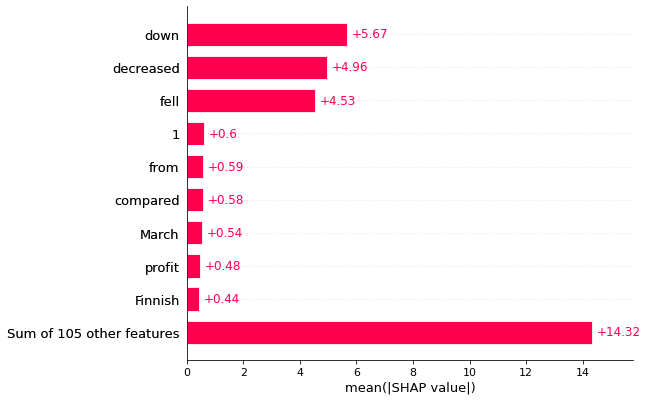

In [ ]:
shap.plots.bar(shap_values)